In [1]:
!pip install numpy pandas matplotlib tensorflow

Random financial data saved to 'current_finance_data.csv'.
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Investment strategy results saved to 'investment_strategy_results.csv'.


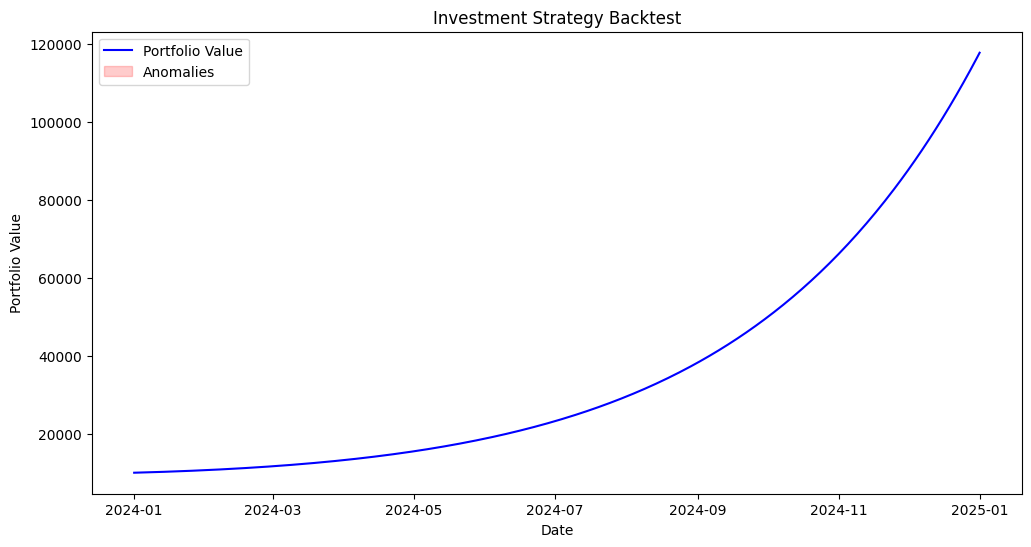

Final Portfolio Value: $117847.96
The investment strategy adjusted allocations based on detected anomalies.


In [3]:
# Import necessary packages
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 1: Generate random financial data and save to CSV
np.random.seed(42)  # For reproducibility
dates = pd.date_range(start="2024-01-01", end="2025-01-01", freq="D")

# Generate random data for the specified columns
data = pd.DataFrame({
    'Date': dates,
    'XAU BGNL': np.cumsum(np.random.normal(0, 1, len(dates))) + 100,
    'BDIY': np.cumsum(np.random.normal(0, 1, len(dates))) + 50,
    'CRY': np.cumsum(np.random.normal(0, 1, len(dates))) + 30,
    'DXY': np.cumsum(np.random.normal(0, 1, len(dates))) + 20,
    'VIX': np.cumsum(np.random.normal(0, 1, len(dates))) + 15,
    'USGG30YR': np.cumsum(np.random.normal(0, 1, len(dates))) + 10,
    'MXUS': np.cumsum(np.random.normal(0, 1, len(dates))) + 200,
})
data.set_index('Date', inplace=False)
data.to_csv('current_finance_data.csv', index=False)
print("Random financial data saved to 'current_finance_data.csv'.")

# Step 2: Load the trained anomaly detection model
model = tf.keras.models.load_model('anomaly_detection_model.h5')

# Step 3: Prepare features for the model
# Selecting features for the model based on the columns
features = ['XAU BGNL', 'BDIY', 'CRY', 'DXY', 'VIX', 'USGG30YR', 'MXUS']
X = data[features].values  # Features for prediction
X = X.reshape((X.shape[0], X.shape[1]))  # Reshape for dense model input

# Step 4: Use the model to predict anomalies
predictions = model.predict(X)
predictions = predictions.reshape(-1)  # Flatten predictions to a 1D array
data['Anomaly'] = predictions > 0.5  # Anomaly = 1 if prediction > 0.5, else 0

# Step 5: Define a data-driven investment strategy
initial_investment = 10000  # Starting portfolio value
data['Safe_Asset_Allocation'] = 0.7 * initial_investment  # Start with 70% in safe assets
data['Risky_Asset_Allocation'] = 0.3 * initial_investment  # Start with 30% in risky assets

# Apply the strategy
for i in range(1, len(data)):
    if data.loc[i, 'Anomaly']:  # Anomaly detected
        # Increase allocation to safe assets, decrease risky allocation
        data.loc[i, 'Safe_Asset_Allocation'] = data.loc[i - 1, 'Safe_Asset_Allocation'] * 1.002
        data.loc[i, 'Risky_Asset_Allocation'] = data.loc[i - 1, 'Risky_Asset_Allocation'] * 0.99
    else:  # No anomaly detected
        # Increase allocation to risky assets, decrease safe allocation
        data.loc[i, 'Safe_Asset_Allocation'] = data.loc[i - 1, 'Safe_Asset_Allocation'] * 0.998
        data.loc[i, 'Risky_Asset_Allocation'] = data.loc[i - 1, 'Risky_Asset_Allocation'] * 1.01

# Calculate total portfolio value
data['Total_Portfolio_Value'] = data['Safe_Asset_Allocation'] + data['Risky_Asset_Allocation']

# Step 6: Save the results with predictions and portfolio values to a new CSV
data.to_csv('investment_strategy_results.csv', index=False)
print("Investment strategy results saved to 'investment_strategy_results.csv'.")

# Step 7: Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Total_Portfolio_Value'], label='Portfolio Value', color='blue')
plt.fill_between(data['Date'], data['Total_Portfolio_Value'], where=data['Anomaly'], color='red', alpha=0.2, label='Anomalies')
plt.title('Investment Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

# Step 8: Print final results
final_portfolio_value = data['Total_Portfolio_Value'].iloc[-1]
print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print("The investment strategy adjusted allocations based on detected anomalies.")
